In [1]:
import correlations
import pandas as pd
import matplotlib as plt

0.8046417134792244


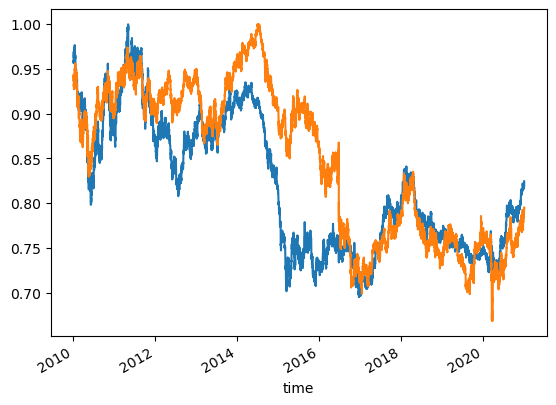

In [2]:
correlations.corr_two_files("../data/EUR_USD_H4.pkl", "../data/GBP_USD_H4.pkl", "EUR_USD_vs_GBP_USD")

0.8364004960548151


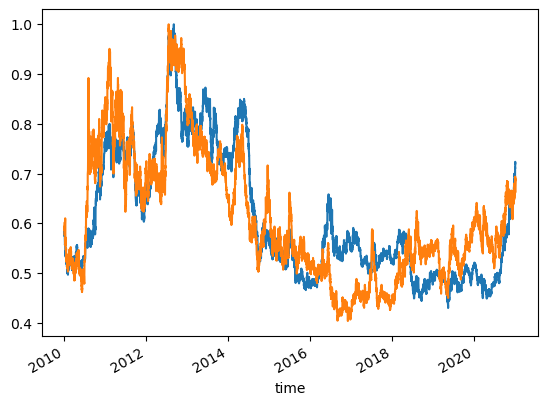

In [3]:
correlations.corr_two_files("../data/SOYBN_USD_H4.pkl", "../data/WHEAT_USD_H4.pkl", "SOYBEANS_vs_WHEAT")

0.4849462245779946


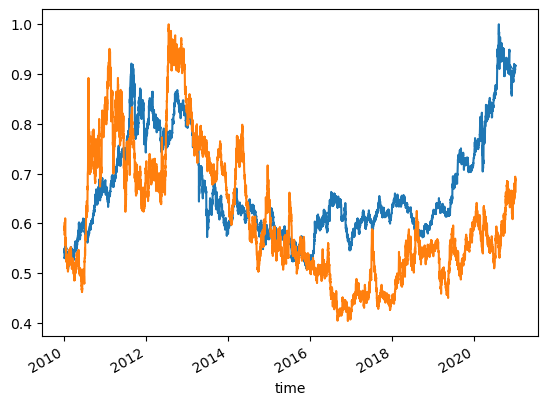

In [4]:
correlations.corr_two_files("../data/XAU_USD_H4.pkl", "../data/WHEAT_USD_H4.pkl", "GOLD_vs_WHEAT")

-0.3896588982120361


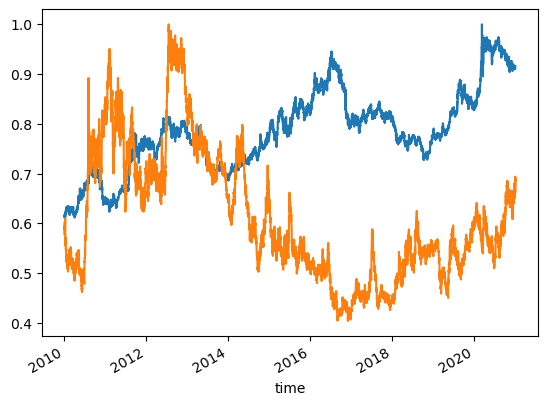

In [5]:
correlations.corr_two_files("../data/USB30Y_USD_H4.pkl", "../data/WHEAT_USD_H4.pkl", "BONDS_vs_WHEAT")

0.4668606718381507


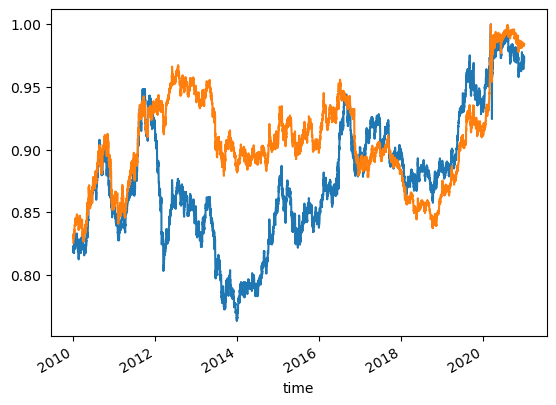

In [6]:
correlations.corr_two_files("../data/UK10YB_GBP_H4.pkl", "../data/USB10Y_USD_H4.pkl", "UK_BONDS_GBP_vs_US_BONDS_USD")

-0.7449694884297587


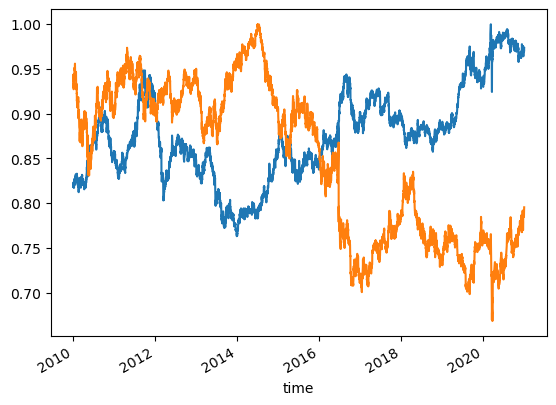

In [7]:
correlations.corr_two_files("../data/UK10YB_GBP_H4.pkl", "../data/GBP_USD_H4.pkl", "UK_BONDS_GBP_vs_GBP_USD")

In [8]:
uk10yb_to_gbp = correlations.get_pickle_df_bid_o("../data/UK10YB_GBP_H4.pkl").rename("uk_bond")
gbp_to_usd = correlations.get_pickle_df_bid_o("../data/GBP_USD_H4.pkl").rename("gbp_to_usd")

In [9]:
# convert UK bonds to USD to we can get the spread between US bonds and UK bonds
joined = pd.concat([uk10yb_to_gbp, gbp_to_usd], axis=1).dropna()
joined

,uk_bond,gbp_to_usd
time,,
2010-01-04 06:00:00,114.636,1.60948
2010-01-04 10:00:00,114.957,1.62039
2010-01-04 14:00:00,115.177,1.61621
2010-01-05 06:00:00,115.322,1.61325
2010-01-05 10:00:00,115.341,1.60502
...,...,...
2020-12-30 06:00:00,136.086,1.35440
2020-12-30 10:00:00,135.871,1.35766
2020-12-30 14:00:00,136.127,1.35998


In [10]:
joined["converted"] = joined["uk_bond"] / joined["gbp_to_usd"]
uk_bond_to_usd = (joined["uk_bond"] / joined["gbp_to_usd"]).rename("uk_bond")
uk_bond_to_usd

time
2010-01-04 06:00:00     71.225489
2010-01-04 10:00:00     70.944032
2010-01-04 14:00:00     71.263635
2010-01-05 06:00:00     71.484271
2010-01-05 10:00:00     71.862656
                          ...    
2020-12-30 06:00:00    100.476964
2020-12-30 10:00:00    100.077339
2020-12-30 14:00:00    100.094854
2020-12-31 06:00:00    100.029360
2020-12-31 10:00:00     99.866008
Name: uk_bond, Length: 8510, dtype: float64

In [11]:
us10yb_to_usd = correlations.get_pickle_df_bid_o("../data/USB10Y_USD_H4.pkl").rename("us_bond")
us10yb_to_usd

time
2010-01-03 22:00:00    116.056
2010-01-04 02:00:00    116.181
2010-01-04 06:00:00    116.006
2010-01-04 10:00:00    116.099
2010-01-04 14:00:00    116.364
                        ...   
2020-12-31 02:00:00    138.241
2020-12-31 06:00:00    138.256
2020-12-31 10:00:00    138.271
2020-12-31 14:00:00    138.208
2020-12-31 18:00:00    138.379
Name: us_bond, Length: 16975, dtype: float64

In [12]:
bond_joined = pd.concat([uk_bond_to_usd, us10yb_to_usd], axis=1).dropna()
bond_joined

,uk_bond,us_bond
time,,
2010-01-04 06:00:00,71.225489,116.006
2010-01-04 10:00:00,70.944032,116.099
2010-01-04 14:00:00,71.263635,116.364
2010-01-05 06:00:00,71.484271,116.687
2010-01-05 10:00:00,71.862656,116.654
...,...,...
2020-12-30 06:00:00,100.476964,138.181
2020-12-30 10:00:00,100.077339,138.103
2020-12-30 14:00:00,100.094854,138.165


In [13]:
spread = bond_joined["us_bond"] - bond_joined["uk_bond"]
spread

time
2010-01-04 06:00:00    44.780511
2010-01-04 10:00:00    45.154968
2010-01-04 14:00:00    45.100365
2010-01-05 06:00:00    45.202729
2010-01-05 10:00:00    44.791344
                         ...    
2020-12-30 06:00:00    37.704036
2020-12-30 10:00:00    38.025661
2020-12-30 14:00:00    38.070146
2020-12-31 06:00:00    38.226640
2020-12-31 10:00:00    38.404992
Length: 8504, dtype: float64

In [14]:
scaled_spread = spread / spread.max()
scaled_gbp_to_usd = gbp_to_usd / gbp_to_usd.max()
print(scaled_spread.corr(scaled_gbp_to_usd))

0.9450589134756668


AttributeError: module 'matplotlib' has no attribute 'show'

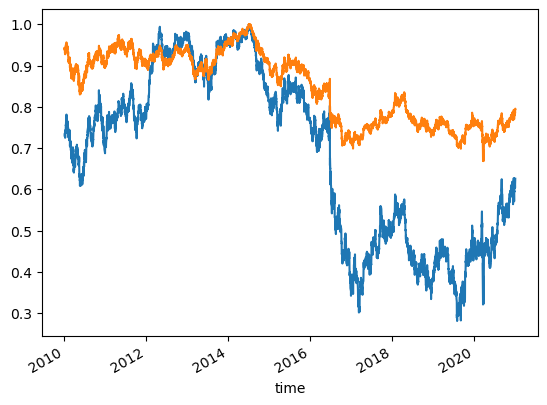

In [15]:
scaled_spread.plot()
scaled_gbp_to_usd.plot()
plt.show()